In [311]:
# Import Data
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import mplcursors
import numpy as np 
from matplotlib.dates import DateFormatter, MonthLocator, YearLocator
from matplotlib.ticker import FuncFormatter
bond_price = pd.read_csv("data/BondPrice.csv")
bond_quant = pd.read_csv("data/BondQuant.csv") 

In [231]:
# Six Percent Loan of 1812 
# L1: 20048 
# Price history
six_percent_prices = bond_price[bond_price["L1 ID"] == 20048] 
six_percent_quant = bond_quant[bond_quant["L1 ID"] == 20048] 
# Drop columns with NaN 
clean_six_percent_prices = six_percent_prices.dropna(axis=1) 

subset_cols = six_percent_quant.columns[2:] 
temp_clean_six_percent_quant = six_percent_quant.dropna(how="all", subset=subset_cols).dropna(axis=1)
# print(clean_six_percent_prices)
print(temp_clean_six_percent_quant)

# Define the threshold
threshold = 0.001
# Function to check if all values in a column are close to zero
def is_close_to_zero(col, threshold):
    return np.all(np.abs(col) < threshold)

cols_to_drop = [col for col in temp_clean_six_percent_quant.iloc[:, 2:].columns if is_close_to_zero(temp_clean_six_percent_quant[col], threshold)]

# Drop the columns
clean_six_percent_quant = temp_clean_six_percent_quant.drop(columns=cols_to_drop)
print(clean_six_percent_quant) 

     L1 ID              Series  1812-06-30  1812-09-30  1812-12-31  \
238  20048  Active Outstanding   2977912.5   5434712.5   7792000.0   
241  20048     Public Holdings   2977912.5   5434712.5   7792000.0   
242  20048   Total Outstanding   2977912.5   5434712.5   7792000.0   

     1813-03-31  1813-06-30  1813-09-30  1813-12-31  1814-03-31  ...  \
238   7710500.0   7710500.0   7710500.0   7710500.0   7710500.0  ...   
241   7710500.0   7710500.0   7710500.0   7710500.0   7710500.0  ...   
242   7710500.0   7710500.0   7710500.0   7710500.0   7710500.0  ...   

       1837-09-30    1837-12-31    1838-03-31    1838-06-30    1838-09-30  \
238 -9.313226e-10 -9.313226e-10 -9.313226e-10 -9.313226e-10 -9.313226e-10   
241 -9.313226e-10 -9.313226e-10 -9.313226e-10 -9.313226e-10 -9.313226e-10   
242 -9.313226e-10 -9.313226e-10 -9.313226e-10 -9.313226e-10 -9.313226e-10   

       1838-12-31    1839-03-31    1839-06-30    1839-09-30    1839-12-31  
238 -9.313226e-10 -9.313226e-10 -9.313226e-10

In [232]:
# Reformat dataframe 
six_percent_prices_melted = clean_six_percent_prices.melt(var_name='Timestamp', value_name='Price')
six_percent_prices_melted = six_percent_prices_melted.iloc[2:].reset_index(drop=True)
# print(six_percent_prices_melted)

# Bond quantities 
active_outstanding = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Active Outstanding"].melt(var_name='Timestamp', value_name='Quant')
active_outstanding = active_outstanding.iloc[2:].reset_index(drop=True)
print(active_outstanding)

public_holdings = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Public Holdings"].melt(var_name='Timestamp', value_name='Quant')
public_holdings = public_holdings.iloc[2:].reset_index(drop=True)
print(public_holdings)

total_outstanding = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Total Outstanding"].melt(var_name='Timestamp', value_name='Quant')
total_outstanding = total_outstanding.iloc[2:].reset_index(drop=True)
print(total_outstanding)

     Timestamp      Quant
0   1812-06-30  2977912.5
1   1812-09-30  5434712.5
2   1812-12-31  7792000.0
3   1813-03-31  7710500.0
4   1813-06-30  7710500.0
..         ...        ...
78  1831-12-31      500.0
79  1832-03-31      500.0
80  1832-06-30      500.0
81  1832-09-30      500.0
82  1832-12-31      500.0

[83 rows x 2 columns]
     Timestamp      Quant
0   1812-06-30  2977912.5
1   1812-09-30  5434712.5
2   1812-12-31  7792000.0
3   1813-03-31  7710500.0
4   1813-06-30  7710500.0
..         ...        ...
78  1831-12-31      500.0
79  1832-03-31      500.0
80  1832-06-30      500.0
81  1832-09-30      500.0
82  1832-12-31      500.0

[83 rows x 2 columns]
     Timestamp      Quant
0   1812-06-30  2977912.5
1   1812-09-30  5434712.5
2   1812-12-31  7792000.0
3   1813-03-31  7710500.0
4   1813-06-30  7710500.0
..         ...        ...
78  1831-12-31      500.0
79  1832-03-31      500.0
80  1832-06-30      500.0
81  1832-09-30      500.0
82  1832-12-31      500.0

[83 rows x 2 colu

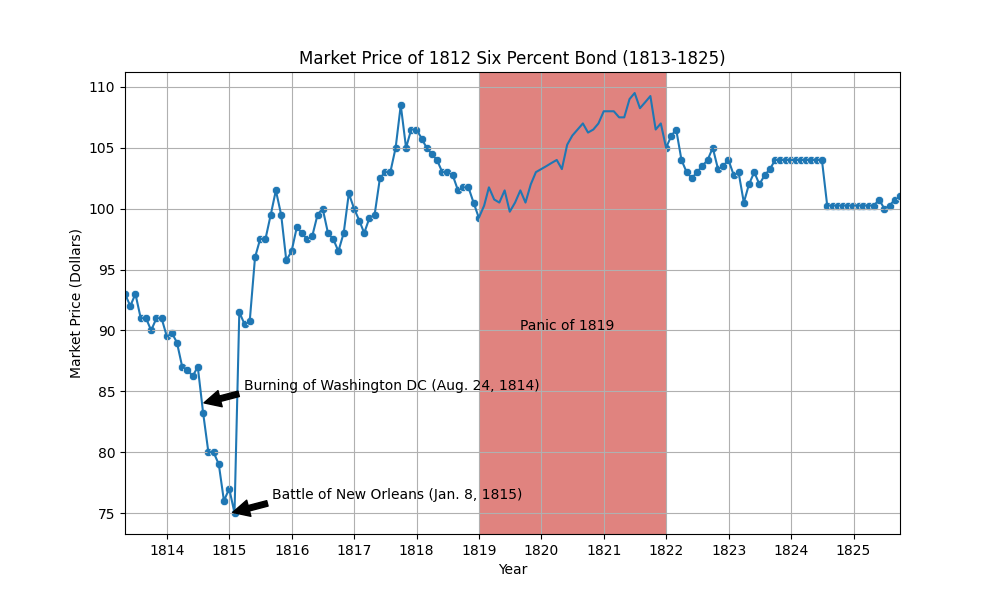

In [312]:
%matplotlib widget
# Graph dataframe 
six_percent_prices_melted['Timestamp'] = pd.to_datetime(six_percent_prices_melted['Timestamp'])

# Set up Seaborn plot
fig, ax = plt.subplots(figsize=(10, 6))
#ax.plot(six_percent_prices_melted['Timestamp'], six_percent_prices_melted['Price'])
#dots = ax.scatter(x, y, color='none')
scatplot = sns.scatterplot(data=six_percent_prices_melted, x='Timestamp', y='Price', marker='o')
scatplot.axvspan(xmin=pd.Timestamp("1819"), xmax=pd.Timestamp("1822"), fc="#E0837F")

# Format x-axis ticks to show year 
date_form = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(YearLocator())
# plt.gca().xaxis.set_major_locator(MonthLocator(interval=4))

# Get the minimum and maximum dates with data (assuming 'date' is a datetime type)
min_date = six_percent_prices_melted['Timestamp'].min()
max_date = six_percent_prices_melted['Timestamp'].max()

# Set the x-axis limits to exclude extra years
plt.xlim(min_date, max_date)

# Enhance plot aesthetics (optional)
plt.xlabel('Year')
plt.ylabel('Market Price (Dollars)')
plt.title('Market Price of 1812 Six Percent Bond (1813-1825)')
plt.grid(True)

# Add hovering features 
def show_hover_panel(get_text_func=None):
    cursor = mplcursors.cursor(
        scatplot, 
        hover=2,  # Transient
        annotation_kwargs=dict(
            bbox=dict(
                boxstyle="square,pad=0.5",
                facecolor="white",
                edgecolor="#ddd",
                linewidth=0.5,
                path_effects=[pe.withSimplePatchShadow(offset=(1.5, -1.5))],
            ),
            linespacing=1.5,
            arrowprops=None,
        ),
        highlight=True,
        highlight_kwargs=dict(linewidth=2),
    )

    if get_text_func:
        cursor.connect(
            event="add",
            func=lambda sel: sel.annotation.set_text(get_text_func(sel.index)),
        )

    return cursor


def on_add(index):
    item = six_percent_prices_melted.iloc[index]
    parts = [
        f"Date: {item.Timestamp.strftime('%Y-%m-%d')}",
        f"Price: {item.Price:,.2f}",
    ]

    return "\n".join(parts)


show_hover_panel(on_add)

ax.text(pd.Timestamp("1820-06"), 90, 'Panic of 1819', horizontalalignment='center')

ax.annotate('Burning of Washington DC (Aug. 24, 1814)',
            xy=(pd.Timestamp("1814-7-24"), 84), xycoords='data',
            xytext=(30, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('Battle of New Orleans (Jan. 8, 1815)',
            xy=(pd.Timestamp("1815-1-08"), 75), xycoords='data',
            xytext=(30, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot(six_percent_prices_melted['Timestamp'], six_percent_prices_melted['Price'])

plt.show()

#TODO
# Add some arrows pointing to some historical events 
# Add interactive elements - dragger 

In [313]:
# reformat dataframe to create separate timestamp and price columns 
# drop NaN columns 
def melt_clean_price(df):
    # Drop columns with NaN 
    clean_df = df.dropna(axis=1) 
    df_melted = clean_df.melt(var_name='Timestamp', value_name='Price')
    df_melted = df_melted.iloc[2:].reset_index(drop=True)
    return df_melted

# Graph for price function
def graph_price(df, title):
    # convert timestamp dtype into datetime dtype
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    # Set up Seaborn plot
    fig, ax = plt.subplots(figsize=(10, 6))
    scatplot = sns.scatterplot(data=df, x='Timestamp', y='Price', marker='o')
    #scatplot.axvspan(xmin=pd.Timestamp("1819"), xmax=pd.Timestamp("1822"), fc="#E0837F")
    # Format x-axis ticks to show year 
    date_form = DateFormatter("%Y")
    plt.gca().xaxis.set_major_formatter(date_form)
    plt.gca().xaxis.set_major_locator(YearLocator())
    # Get the minimum and maximum dates with data (assuming 'date' is a datetime type)
    min_date = df['Timestamp'].min()
    max_date = df['Timestamp'].max()
    # Set the x-axis limits to exclude extra years
    plt.xlim(min_date, max_date)

    # Enhance plot aesthetics (optional)
    plt.xlabel('Year')
    plt.ylabel('Market Price (Dollars)')
    plt.title(title)
    plt.grid(True)

    # Add hovering features 
    def show_hover_panel(get_text_func=None):
        cursor = mplcursors.cursor(
            scatplot, 
            hover=2,  # Transient
            annotation_kwargs=dict(
                bbox=dict(
                    boxstyle="square,pad=0.5",
                    facecolor="white",
                    edgecolor="#ddd",
                    linewidth=0.5,
                    path_effects=[pe.withSimplePatchShadow(offset=(1.5, -1.5))],
                ),
                linespacing=1.5,
                arrowprops=None,
            ),
            highlight=True,
            highlight_kwargs=dict(linewidth=2),
        )
    
        if get_text_func:
            cursor.connect(
                event="add",
                func=lambda sel: sel.annotation.set_text(get_text_func(df, sel.index)),
            )
    
        return cursor
    
    
    def on_add(df, index):
        item = df.iloc[index]
        parts = [
            f"Date: {item.Timestamp.strftime('%Y-%m-%d')}",
            f"Price: {item.Price:,.2f}",
        ]
    
        return "\n".join(parts)

    show_hover_panel(on_add) # add cursor hover features 

    plt.plot(df['Timestamp'], df['Price'])
    
    return plt # return completed figure 

In [314]:
# clean quant dataframe 
# returns a series with chosen row 
def clean_quant(quant_df):
    subset_cols = quant_df.columns[2:] 
    # Drop rows where all columns are Nan 
    temp_clean_quant_df = quant_df.dropna(how="all", subset=subset_cols).dropna(axis=1)
    # print(clean_six_percent_prices)
    # print(temp_clean_six_percent_quant)
    
    # Define the threshold
    threshold = 0.001
    # Function to check if all values in a column are close to zero
    def is_close_to_zero(col, threshold):
        return np.all(np.abs(col) < threshold)
    
    cols_to_drop = [col for col in temp_clean_quant_df.iloc[:, 2:].columns if is_close_to_zero(temp_clean_quant_df[col], threshold)]
    
    # Drop the columns
    clean_quant_df = temp_clean_quant_df.drop(columns=cols_to_drop)
    return clean_quant_df
    # print(clean_quant_df) 

def reformat_quant(clean_quant_df, row):
    # reformat dataframe to include timestamp and quant columns 
    series_data = clean_quant_df[clean_quant_df["Series"] == row].melt(var_name='Timestamp', value_name='Quant')
    series_data = series_data.iloc[2:].reset_index(drop=True)
    series_data['Timestamp'] = pd.to_datetime(series_data['Timestamp']) #convert timestamp column to a datetime object 
    return series_data # return the selected row 

# graphing function
def graph_quant(df, title):
    # Set up Seaborn plot
    fig, ax = plt.subplots(figsize=(10, 6))
    # lineplot = sns.lineplot(data=df, x="Timestamp", y="Quant") 
    scatplot = sns.scatterplot(data=df, x='Timestamp', y='Quant', marker='o')
    #scatplot.axvspan(xmin=pd.Timestamp("1819"), xmax=pd.Timestamp("1822"), fc="#E0837F")
    # Format x-axis ticks to show year 
    date_form = DateFormatter("%Y")
    plt.gca().xaxis.set_major_formatter(date_form)
    plt.gca().xaxis.set_major_locator(YearLocator(2))
    # Get the minimum and maximum dates with data (assuming 'date' is a datetime type)
    min_date = df['Timestamp'].min()
    max_date = df['Timestamp'].max()
    # Set the x-axis limits to exclude extra years
    plt.xlim(min_date, max_date)

    # reformat y-axis to be in millions, not tens of millions
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1e6)))

    # Enhance plot aesthetics (optional)
    plt.xlabel('Year')
    plt.ylabel('Total Outstanding (millions)')
    plt.title(title)
    plt.grid(True)

        # Add hovering features 
    def show_hover_panel(get_text_func=None):
        cursor = mplcursors.cursor(
            scatplot, 
            hover=2,  # Transient
            annotation_kwargs=dict(
                bbox=dict(
                    boxstyle="square,pad=0.5",
                    facecolor="white",
                    edgecolor="#ddd",
                    linewidth=0.5,
                    path_effects=[pe.withSimplePatchShadow(offset=(1.5, -1.5))],
                ),
                linespacing=1.5,
                arrowprops=None,
            ),
            highlight=True,
            highlight_kwargs=dict(linewidth=2),
        )
    
        if get_text_func:
            cursor.connect(
                event="add",
                func=lambda sel: sel.annotation.set_text(get_text_func(df, sel.index)),
            )
    
        return cursor
    
    
    def on_add(df, index):
        item = df.iloc[index]
        parts = [
            f"Date: {item.Timestamp.strftime('%Y-%m-%d')}",
            f"Quant: {item.Quant:,.2f}",
        ]
    
        return "\n".join(parts)

    show_hover_panel(on_add) # add cursor hover features 
    
    plt.plot(df['Timestamp'], df['Quant'])
    return plt

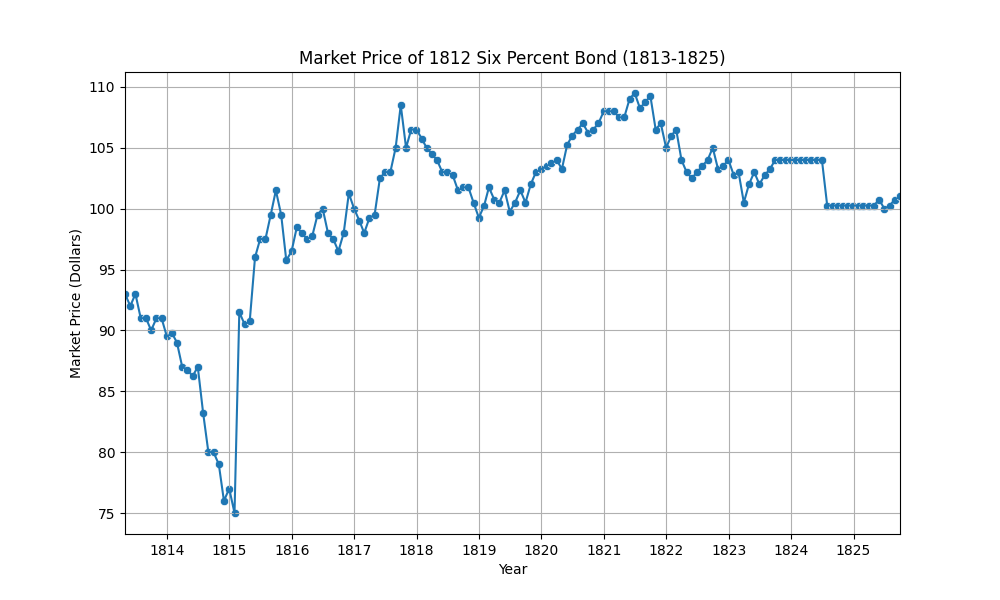

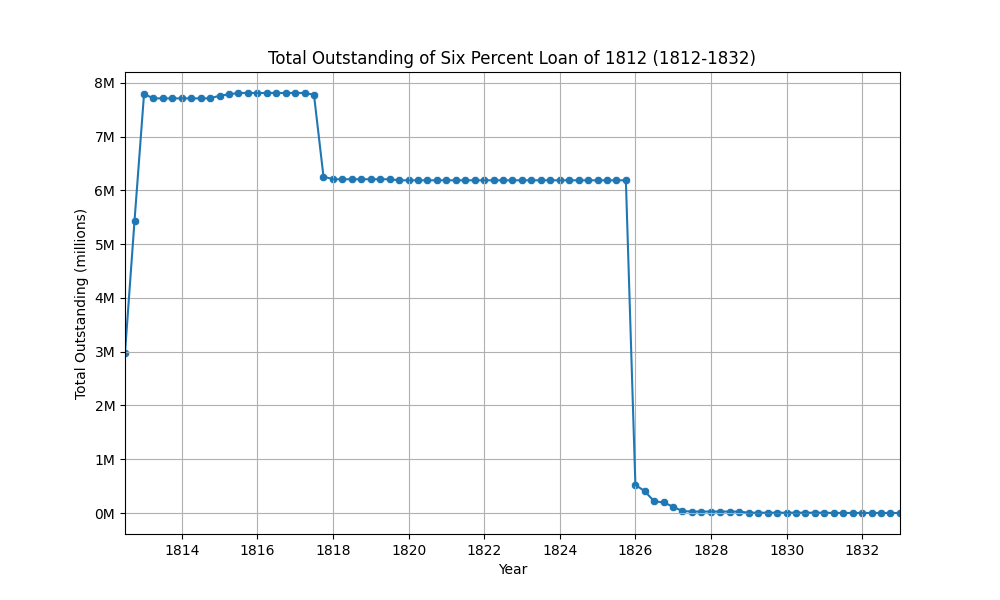

True


In [315]:
# Six percent loan of 1812 
# prices 
six_percent_prices = bond_price[bond_price["L1 ID"] == 20048] 
six_percent_prices_melted = melt_clean_price(six_percent_prices) # clean and melt (reformat) dataframe 
six_percent = graph_price(six_percent_prices_melted, 'Market Price of 1812 Six Percent Bond (1813-1825)')
six_percent.show()

# quantities 
six_percent_quant = bond_quant[bond_quant["L1 ID"] == 20048]
clean_six_percent_quant = clean_quant(six_percent_quant)
#print(clean_six_percent_quant) 
total_outstanding = reformat_quant(clean_six_percent_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Six Percent Loan of 1812 (1812-1832)") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_six_percent_quant, "Public Holdings")
#public_holdings.show()
print(public_holdings.equals(total_outstanding))

In [ ]:
# temporary loan of 1812 
# prices - no price data 
"""
temp_loan_1812_prices = bond_price[bond_price["L1 ID"] == 20049] 
temp_loan_1812_prices_melted = melt_clean_price(temp_loan_1812_prices) # clean and melt (reformat) dataframe 
print(temp_loan_1812_prices_melted)
temp_loan_1812 = graph_price(temp_loan_1812_prices_melted, 'Market Price of Temporary Loan of 1812 (1813-1825)')
temp_loan_1812.show()
"""

# quantities 
temp_loan_1812_quant = bond_quant[bond_quant["L1 ID"] == 20049]
clean_temp_loan_1812_quant = clean_quant(temp_loan_1812_quant)
print(clean_six_percent_quant) 
total_outstanding = reformat_quant(clean_temp_loan_1812_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Temporary Loan of 1812 (1812-1817)") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_temp_loan_1812_quant, "Public Holdings")
#public_holdings.show()
print(public_holdings.equals(total_outstanding))

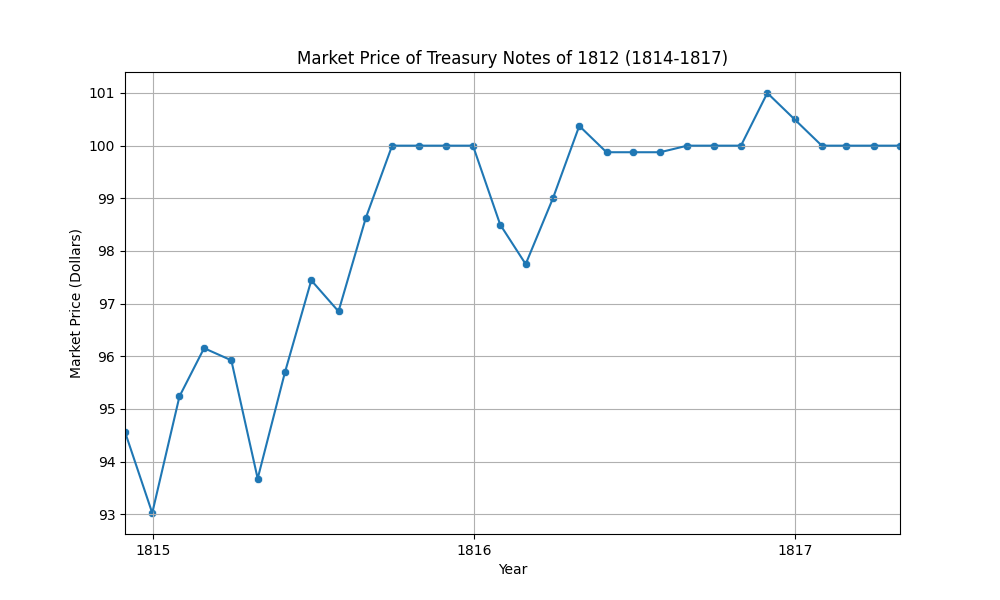

     L1 ID              Series  1812-12-31  1813-03-31  1813-06-30  \
248  20050  Active Outstanding   2835500.0   4752500.0   4792500.0   
251  20050     Public Holdings   2835500.0   4752500.0   4792500.0   
252  20050   Total Outstanding   2835500.0   4752500.0   4792500.0   

     1813-09-30  1813-12-31  1814-03-31  1814-06-30  1814-09-30  ...  \
248   4898300.0   5000000.0   5000000.0   2848800.0   2848800.0  ...   
251   4898300.0   5000000.0   5000000.0   2848800.0   2848800.0  ...   
252   4898300.0   5000000.0   5000000.0   2848800.0   2848800.0  ...   

     1834-09-30  1834-12-31  1835-03-31  1835-06-30  1835-09-30  1835-12-31  \
248       100.0       100.0       100.0       100.0       100.0       100.0   
251       100.0       100.0       100.0       100.0       100.0       100.0   
252       100.0       100.0       100.0       100.0       100.0       100.0   

     1836-03-31  1836-06-30  1836-09-30  1836-12-31  
248       100.0       100.0       100.0       100.0  
251  

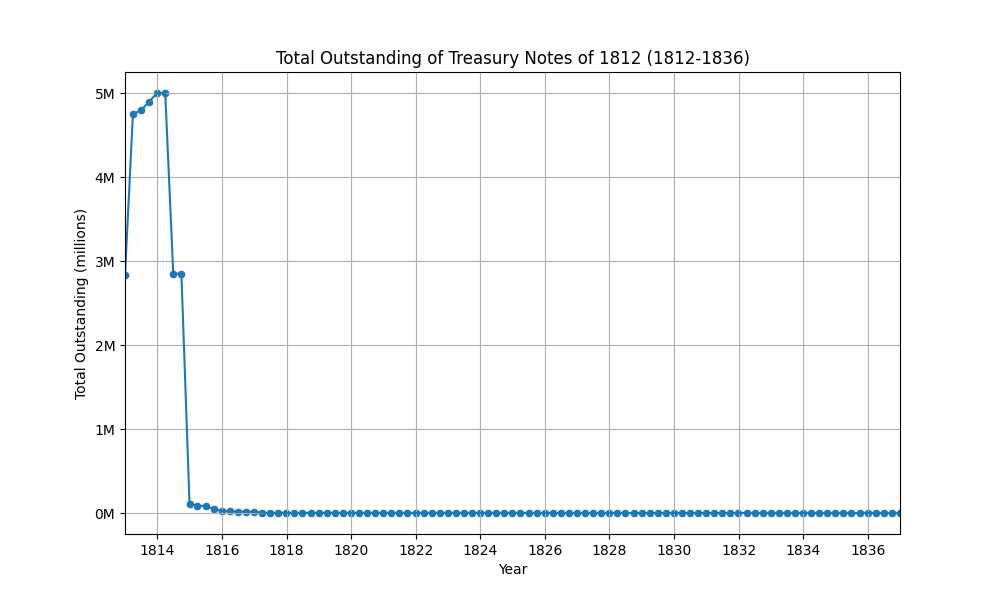

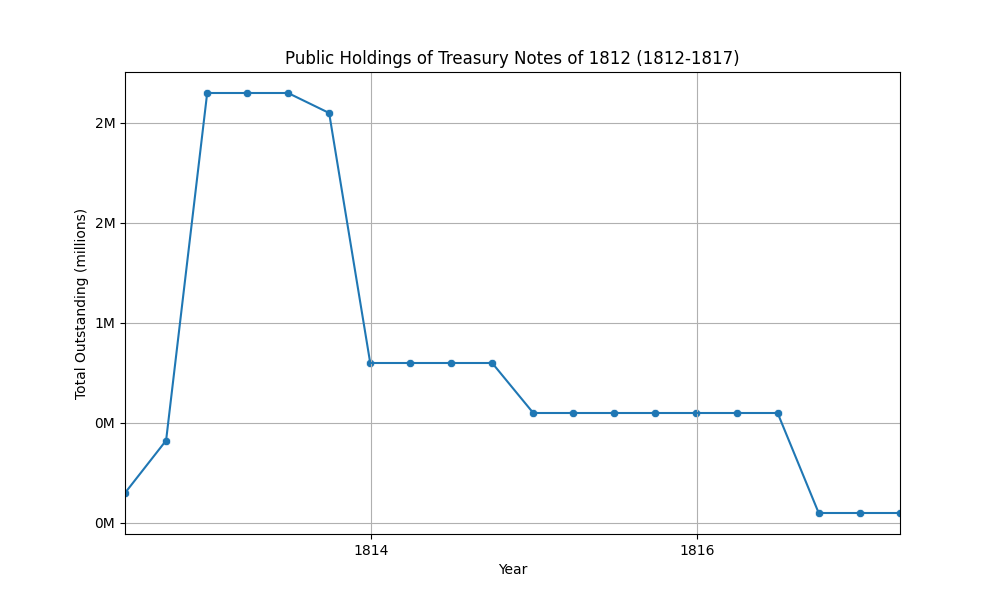

False


In [316]:
# treasury notes of 1812 prices 
treasure_notes_prices = bond_price[bond_price["L1 ID"] == 20050] 
treasure_notes_melted = melt_clean_price(treasure_notes_prices) # clean and melt (reformat) dataframe 
# print(treasure_notes_melted) 
treasure_notes = graph_price(treasure_notes_melted, 'Market Price of Treasury Notes of 1812 (1814-1817)')
treasure_notes.show()

# quantities 
treasure_notes_1812_quant = bond_quant[bond_quant["L1 ID"] == 20050]
clean_treasure_notes_1812_quant = clean_quant(treasure_notes_1812_quant)
print(clean_treasure_notes_1812_quant) 
total_outstanding = reformat_quant(clean_treasure_notes_1812_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Treasury Notes of 1812 (1812-1836)") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_temp_loan_1812_quant, "Public Holdings")
public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Treasury Notes of 1812 (1812-1817)") 
public_holdings_plot.show()
print(public_holdings.equals(total_outstanding))

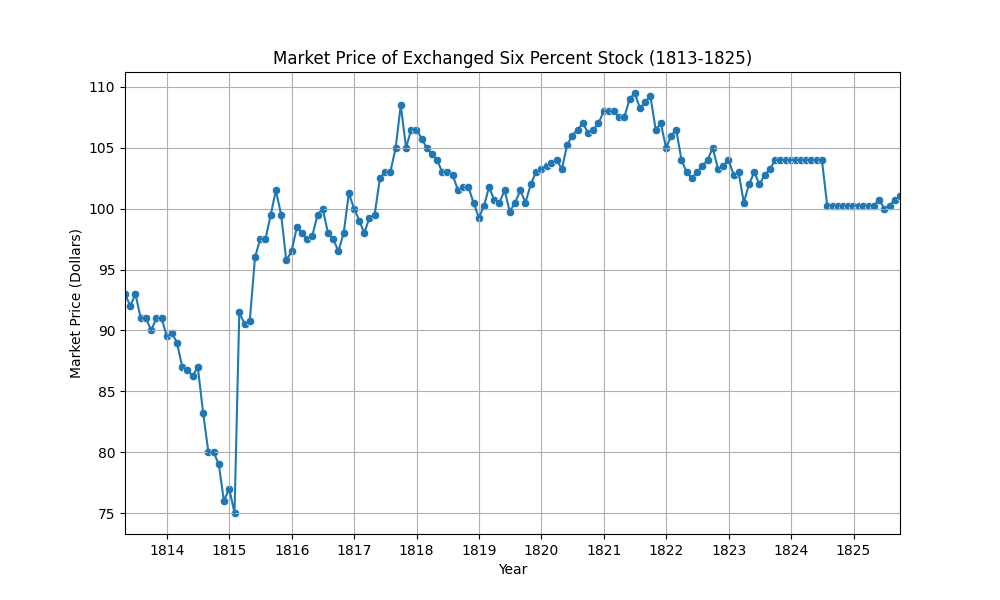

     L1 ID              Series  1812-12-31  1813-03-31  1813-06-30  \
253  20051  Active Outstanding  2745120.58  2984746.72  2984746.72   
256  20051     Public Holdings  2745120.58  2984746.72  2984746.72   
257  20051   Total Outstanding  2745120.58  2984746.72  2984746.72   

     1813-09-30  1813-12-31  1814-03-31  1814-06-30  1814-09-30  ...  \
253  2984746.72  2984746.72  2984746.72  2984746.72  2984746.72  ...   
256  2984746.72  2984746.72  2984746.72  2984746.72  2984746.72  ...   
257  2984746.72  2984746.72  2984746.72  2984746.72  2984746.72  ...   

     1824-09-30  1824-12-31  1825-03-31  1825-06-30  1825-09-30  1825-12-31  \
253  2668974.99  2668974.99   177650.18    55924.88    52210.62    16837.04   
256  2668974.99  2668974.99   177650.18    55924.88    52210.62    16837.04   
257  2668974.99  2668974.99   177650.18    55924.88    52210.62    16837.04   

     1826-03-31  1826-06-30  1826-09-30  1826-12-31  
253     8187.18     5491.05     5491.05     1477.08  
256  

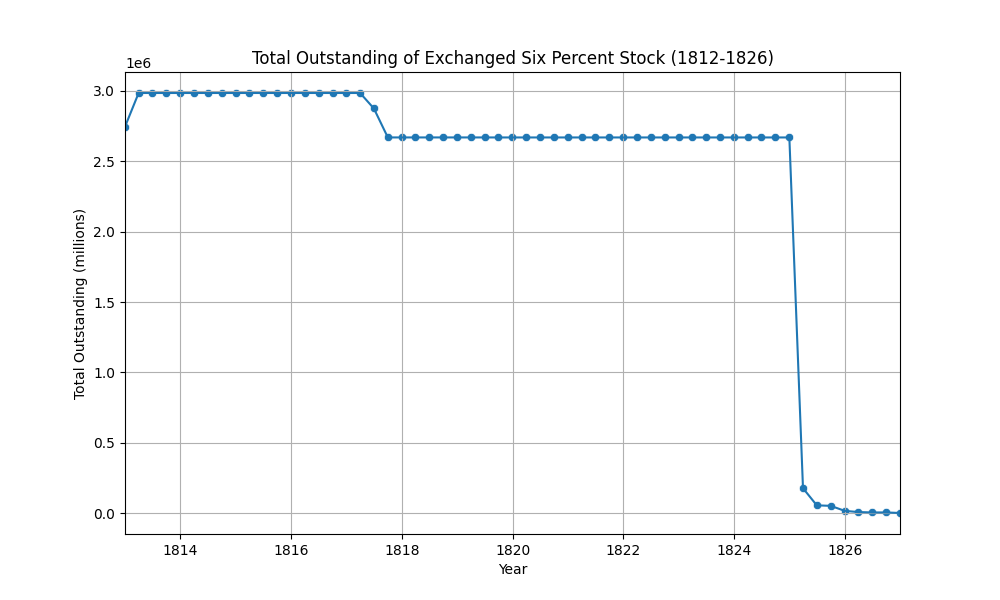

True


In [290]:
# Exchanged 6% stock 
exchanged_six_prices = bond_price[bond_price["L1 ID"] == 20051] 
exchanged_six_melted = melt_clean_price(exchanged_six_prices) # clean and melt (reformat) dataframe 
exchanged_six = graph_price(exchanged_six_melted, 'Market Price of Exchanged Six Percent Stock (1813-1825)') 
exchanged_six.show()

# quantities 
exchanged_six_quant = bond_quant[bond_quant["L1 ID"] == 20051]
clean_exchanged_six_quant = clean_quant(exchanged_six_quant)
print(clean_exchanged_six_quant) 
total_outstanding = reformat_quant(clean_exchanged_six_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Exchanged Six Percent Stock (1812-1826)") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_exchanged_six_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()
print(public_holdings.equals(total_outstanding))

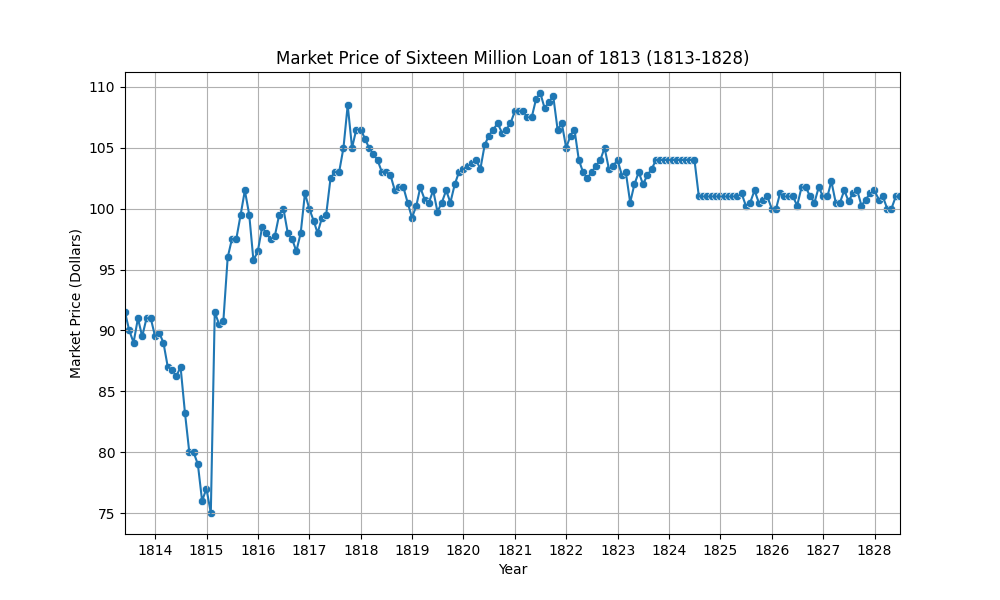

     L1 ID              Series  1813-03-31  1813-06-30  1813-09-30  \
258  20052  Active Outstanding   1086737.5  11352012.5  14488125.0   
261  20052     Public Holdings   1086737.5  11352012.5  14488125.0   
262  20052   Total Outstanding   1086737.5  11352012.5  14488125.0   

      1813-12-31   1814-03-31   1814-06-30   1814-09-30   1814-12-31  ...  \
258  18109377.43  18109377.43  18109377.43  18109377.43  18109377.43  ...   
261  18109377.43  18109377.43  18109377.43  18109377.43  18109377.43  ...   
262  18109377.43  18109377.43  18109377.43  18109377.43  18109377.43  ...   

     1837-09-30  1837-12-31  1838-03-31  1838-06-30  1838-09-30  1838-12-31  \
258     5546.39     5546.39     5546.39     5546.39     5546.39     5546.39   
261     5546.39     5546.39     5546.39     5546.39     5546.39     5546.39   
262     5546.39     5546.39     5546.39     5546.39     5546.39     5546.39   

     1839-03-31  1839-06-30  1839-09-30  1839-12-31  
258     5546.39     5546.39     5546.39

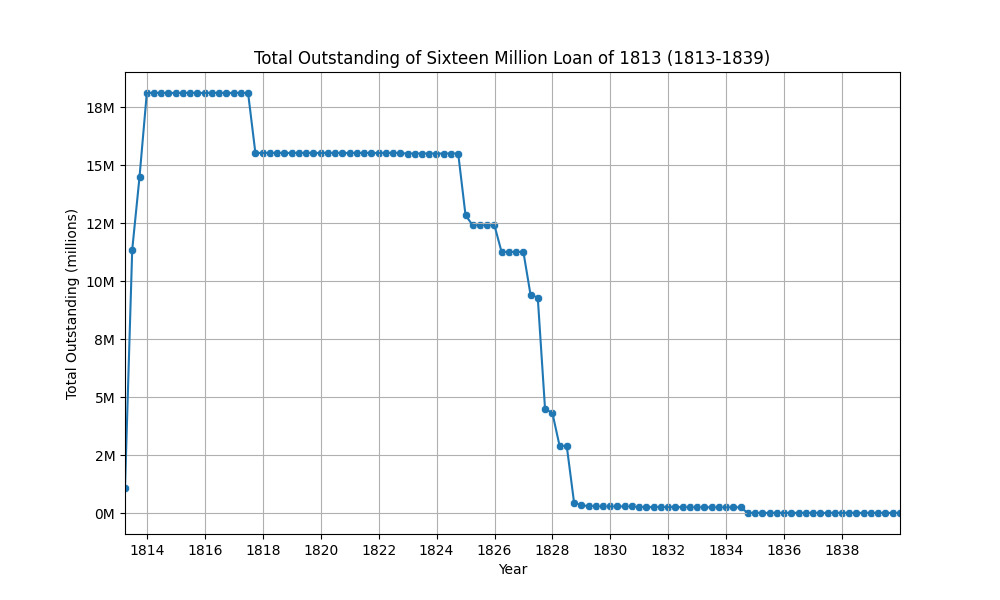

True


In [317]:
# Sixteen million loan of 1813 
sixteen_mil_prices = bond_price[bond_price["L1 ID"] == 20052] 
sixteen_mil_melted = melt_clean_price(sixteen_mil_prices) # clean and melt (reformat) dataframe 
sixteen_mil = graph_price(sixteen_mil_melted, 'Market Price of Sixteen Million Loan of 1813 (1813-1828)') 
sixteen_mil.show()

# quantities 
sixteen_mil_quant = bond_quant[bond_quant["L1 ID"] == 20052]
clean_sixteen_mil_quant = clean_quant(sixteen_mil_quant)
print(clean_sixteen_mil_quant) 
total_outstanding = reformat_quant(clean_sixteen_mil_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Sixteen Million Loan of 1813 (1813-1839)") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_sixteen_mil_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()
print(public_holdings.equals(total_outstanding))

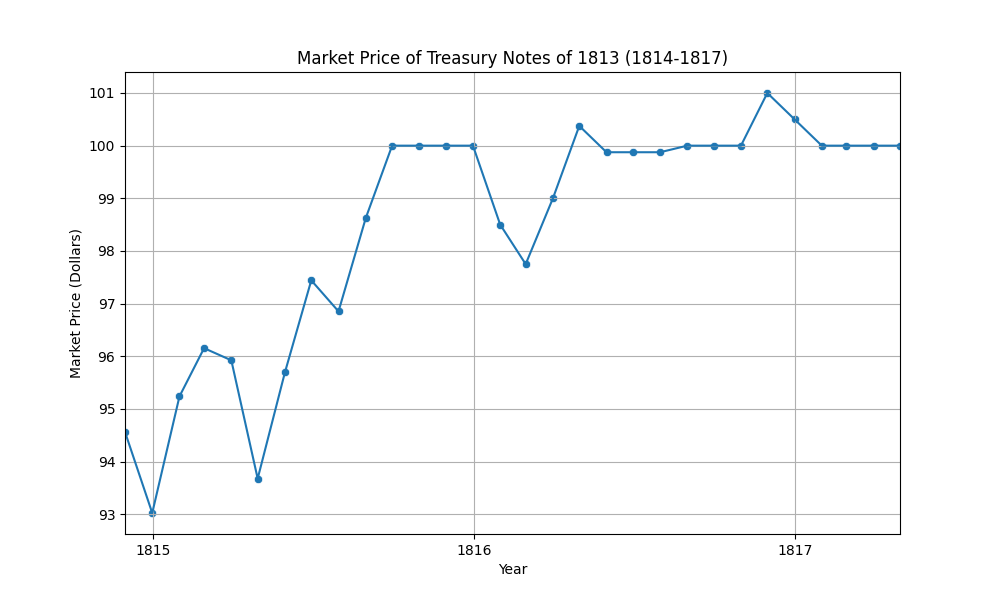

     L1 ID              Series  1813-03-31  1813-06-30  1813-09-30  \
263  20053  Active Outstanding     32000.0    253000.0    253000.0   
266  20053     Public Holdings     32000.0    253000.0    253000.0   
267  20053   Total Outstanding     32000.0    253000.0    253000.0   

     1813-12-31  1814-03-31  1814-06-30  1814-09-30  1814-12-31  ...  \
263   3930000.0   5000000.0   4800000.0   4800000.0   4053100.0  ...   
266   3930000.0   5000000.0   4800000.0   4800000.0   4053100.0  ...   
267   3930000.0   5000000.0   4800000.0   4800000.0   4053100.0  ...   

     1834-09-30  1834-12-31  1835-03-31  1835-06-30  1835-09-30  1835-12-31  \
263       900.0       900.0       900.0       900.0       900.0       900.0   
266       900.0       900.0       900.0       900.0       900.0       900.0   
267       900.0       900.0       900.0       900.0       900.0       900.0   

     1836-03-31  1836-06-30  1836-09-30  1836-12-31  
263       900.0       900.0       900.0       900.0  
266  

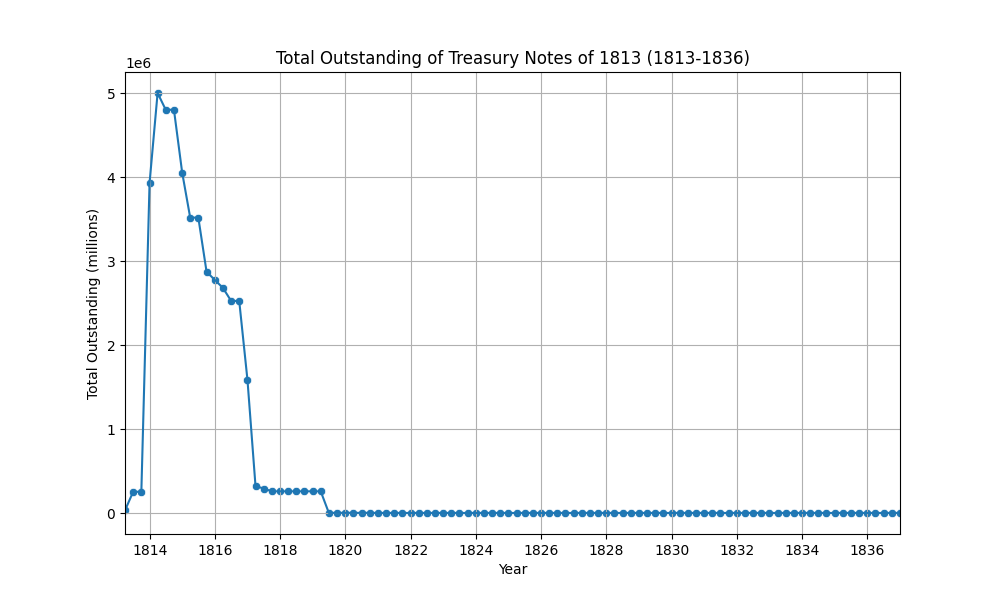

True


In [294]:
# Treasury Notes of 1813 
treasury_notes_1813_prices = bond_price[bond_price["L1 ID"] == 20053] 
treasury_notes_1813_melted = melt_clean_price(treasury_notes_1813_prices) # clean and melt (reformat) dataframe 
treasury_notes_1813 = graph_price(treasury_notes_1813_melted, 'Market Price of Treasury Notes of 1813 (1814-1817)') 
treasury_notes_1813.show()

# quantities 
treasury_notes_1813_quant = bond_quant[bond_quant["L1 ID"] == 20053]
clean_treasury_notes_1813_quant = clean_quant(treasury_notes_1813_quant)
print(clean_treasury_notes_1813_quant) 
total_outstanding = reformat_quant(clean_treasury_notes_1813_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Treasury Notes of 1813 (1813-1836)") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_treasury_notes_1813_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()
print(public_holdings.equals(total_outstanding))

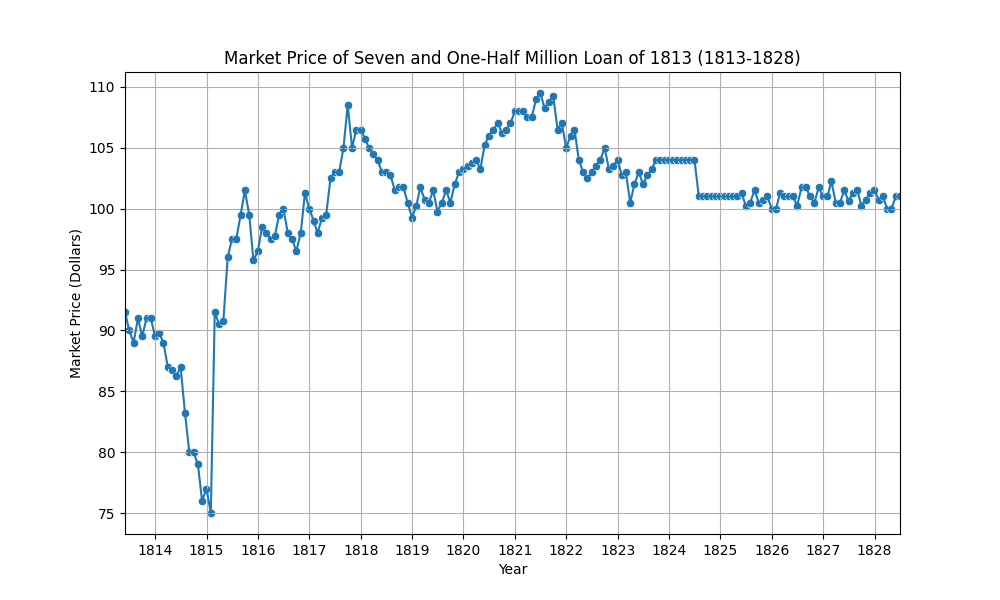

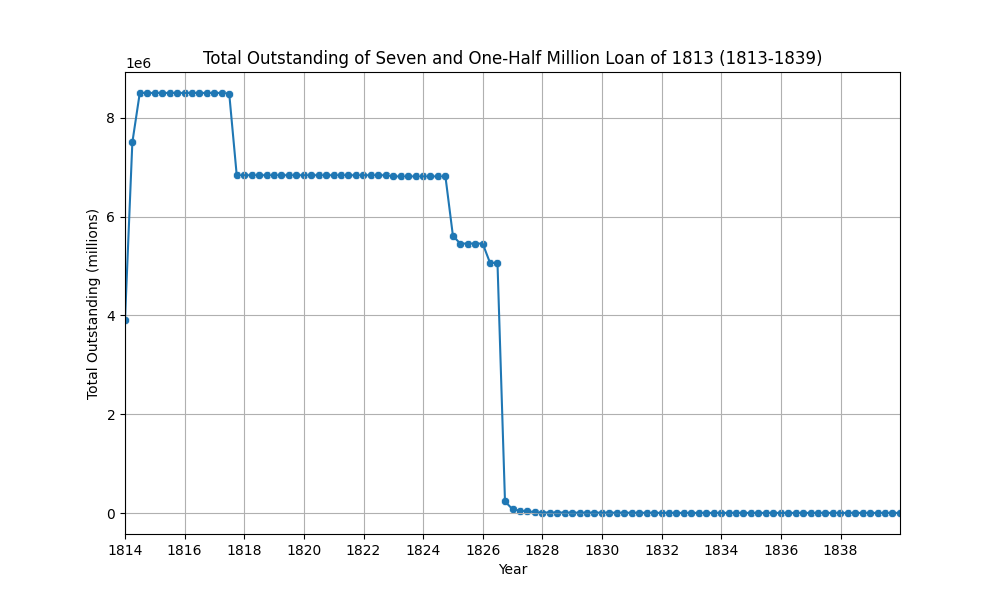

True


In [295]:
# seven and one-half million loan of 1813 
seven_one_half_prices = bond_price[bond_price["L1 ID"] == 20054] 
seven_one_half_melted = melt_clean_price(seven_one_half_prices) # clean and melt (reformat) dataframe 
seven_one_half = graph_price(seven_one_half_melted, 'Market Price of Seven and One-Half Million Loan of 1813 (1813-1828)') 
seven_one_half.show()

# quantities 
seven_one_half_quant = bond_quant[bond_quant["L1 ID"] == 20054]
clean_seven_one_half_quant = clean_quant(seven_one_half_quant)
#print(clean_seven_one_half_quant) 
total_outstanding = reformat_quant(clean_seven_one_half_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Seven and One-Half Million Loan of 1813 (1813-1839)") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_seven_one_half_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()
print(public_holdings.equals(total_outstanding))

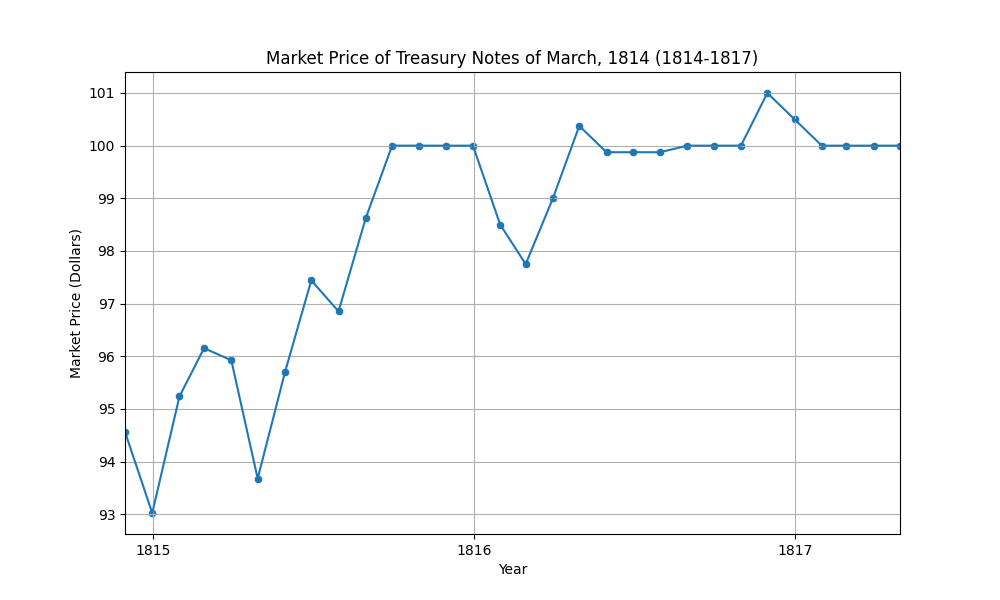

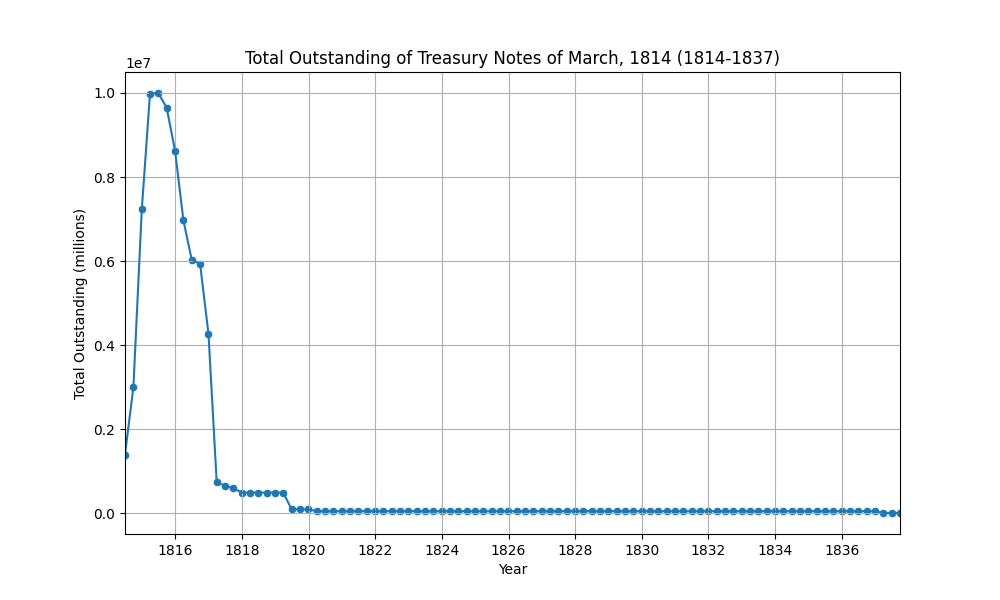

True


In [297]:
# treasury notes of March, 1814
notes_1814_prices = bond_price[bond_price["L1 ID"] == 20055] 
notes_1814_melted = melt_clean_price(notes_1814_prices) # clean and melt (reformat) dataframe 
notes_1814 = graph_price(notes_1814_melted, "Market Price of Treasury Notes of March, 1814 (1814-1817)")  
notes_1814.show()

# quantities 
notes_1814_quant = bond_quant[bond_quant["L1 ID"] == 20055]
clean_notes_1814_quant = clean_quant(notes_1814_quant)
#print(clean_seven_one_half_quant) 
total_outstanding = reformat_quant(clean_notes_1814_quant, "Total Outstanding")
#print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Treasury Notes of March, 1814 (1814-1837)") 
total_outstanding_plot.show()

public_holdings = reformat_quant(clean_notes_1814_quant, "Public Holdings")
#public_holdings_plot = graph_quant(public_holdings, "Public Holdings of Exchanged Six Percent Stock (1812-1817)") 
#public_holdings_plot.show()
print(public_holdings.equals(total_outstanding))

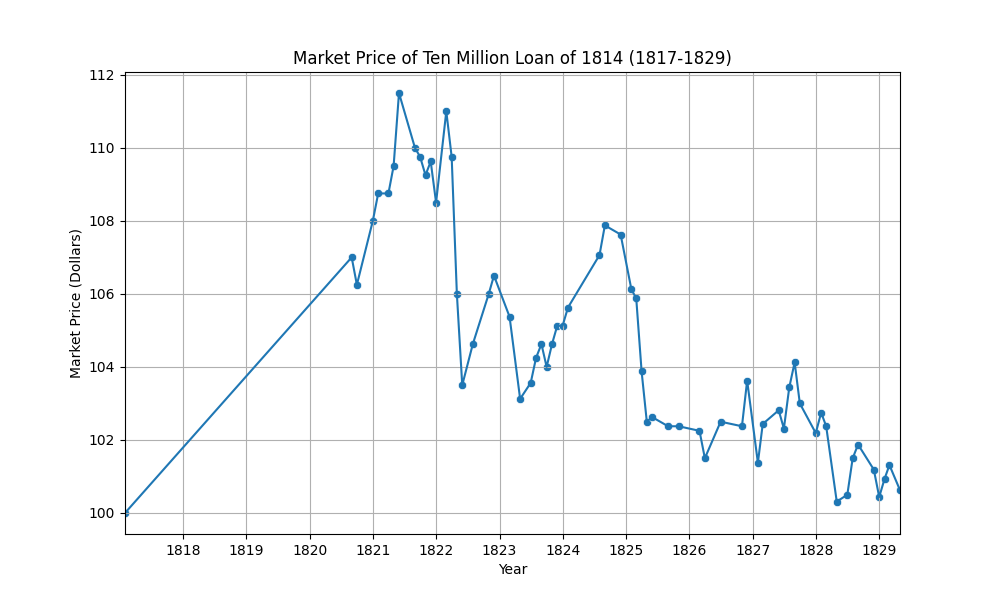

In [242]:
# 10 mil loan of 1814 
ten_mil_prices = bond_price[bond_price["L1 ID"] == 20056] 
ten_mil_melted = melt_clean_price(ten_mil_prices) # clean and melt (reformat) dataframe 
ten_mil = graph_price(ten_mil_melted, "Market Price of Ten Million Loan of 1814 (1817-1829)")  
ten_mil.show()

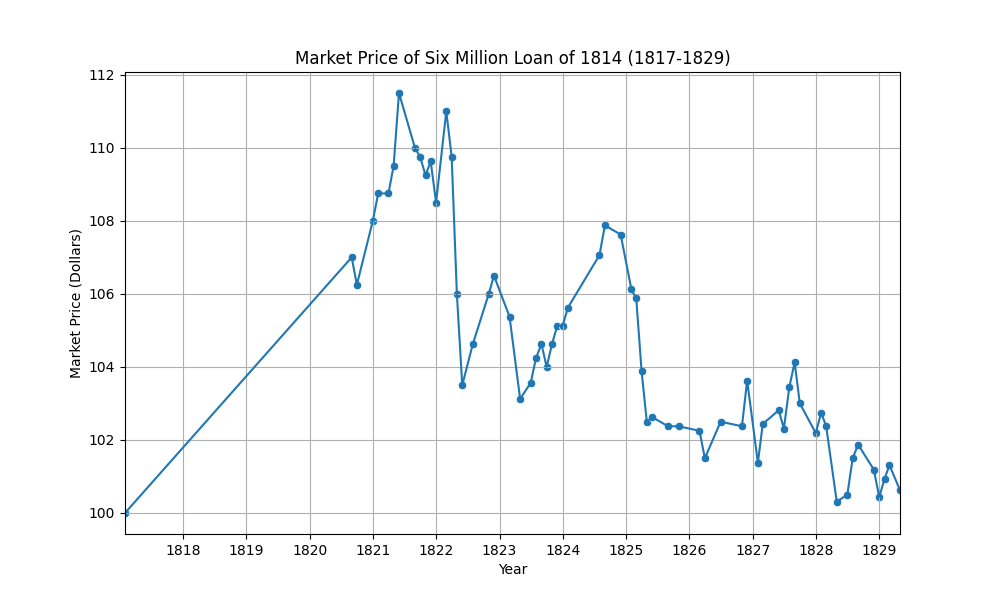

In [243]:
# Six Million Loan of 1814 
six_mil_1814_prices = bond_price[bond_price["L1 ID"] == 20057] 
six_mil_1814_melted = melt_clean_price(six_mil_1814_prices) # clean and melt (reformat) dataframe 
six_mil_1814 = graph_price(six_mil_1814_melted, "Market Price of Six Million Loan of 1814 (1817-1829)")  
six_mil_1814.show()

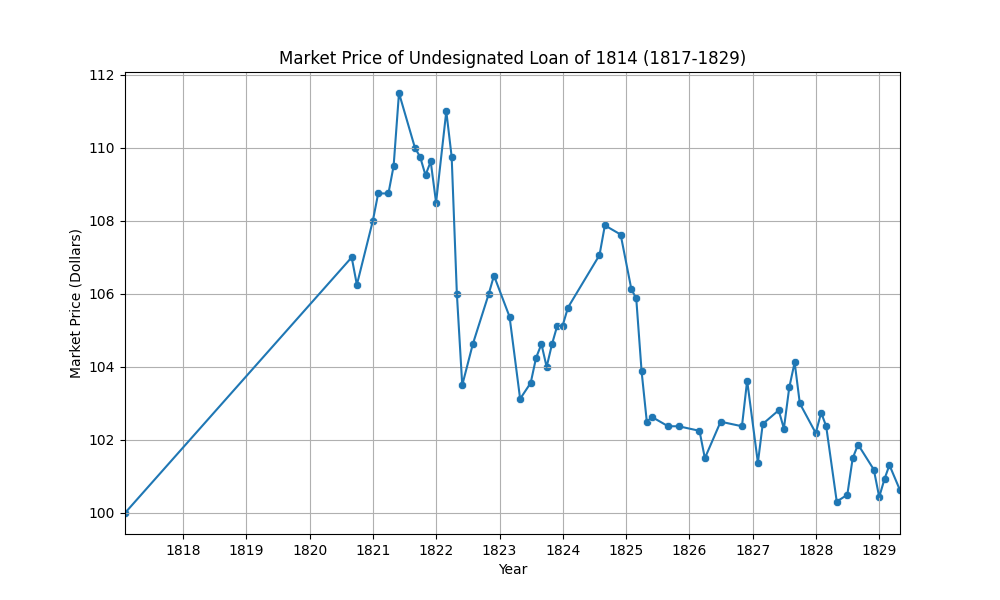

In [253]:
# Undesignated Loan of 1814
undesignated_1814_prices = bond_price[bond_price["L1 ID"] == 20058] 
undesignated_1814_melted = melt_clean_price(undesignated_1814_prices) # clean and melt (reformat) dataframe 
undesignated_1814 = graph_price(undesignated_1814_melted, "Market Price of Undesignated Loan of 1814 (1817-1829)")  
undesignated_1814.show()

    Timestamp      Quant
0  1814-12-31   150000.0
1  1815-03-31  334032.22
2  1815-06-30  408622.97
3  1815-09-30  408622.97
4  1815-12-31  408622.97
..        ...        ...
74 1833-06-30    1760.91
75 1833-09-30    1760.91
76 1833-12-31    1760.91
77 1834-03-31    1760.91
78 1834-06-30    1760.91

[79 rows x 2 columns]


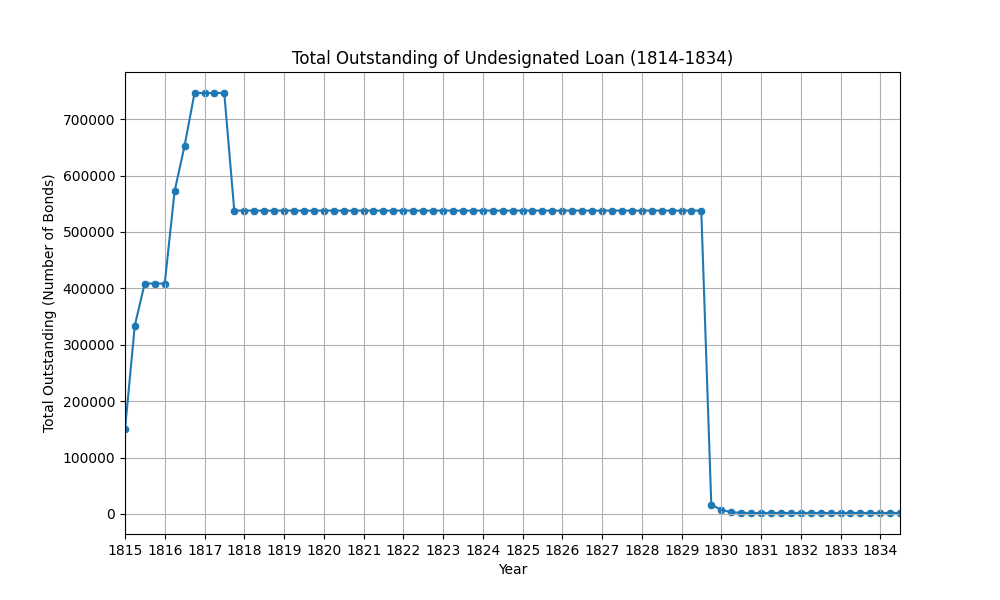

'\n# Bond quantities \nactive_outstanding = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Active Outstanding"].melt(var_name=\'Timestamp\', value_name=\'Quant\')\nactive_outstanding = active_outstanding.iloc[2:].reset_index(drop=True)\nprint(active_outstanding)\n\npublic_holdings = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Public Holdings"].melt(var_name=\'Timestamp\', value_name=\'Quant\')\npublic_holdings = public_holdings.iloc[2:].reset_index(drop=True)\nprint(public_holdings)\n\ntotal_outstanding = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Total Outstanding"].melt(var_name=\'Timestamp\', value_name=\'Quant\')\ntotal_outstanding = total_outstanding.iloc[2:].reset_index(drop=True)\nprint(total_outstanding)\n'

In [259]:
undesignated_1814_quant = bond_quant[bond_quant["L1 ID"] == 20058]
clean_undesignated_1814_quant = clean_quant(undesignated_1814_quant)
#print(clean_undesignated_1814_quant) 
total_outstanding = reformat_quant(clean_undesignated_1814_quant, "Total Outstanding")
print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Undesignated Loan (1814-1834)") 
total_outstanding_plot.show()

#public_holdings = reformat_quant(clean_undesignated_1814_quant, "Public Holdings")
#public_holdings.show()
#print(public_holdings)
#print(public_holdings.equals(total_outstanding))
"""
# Bond quantities 
active_outstanding = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Active Outstanding"].melt(var_name='Timestamp', value_name='Quant')
active_outstanding = active_outstanding.iloc[2:].reset_index(drop=True)
print(active_outstanding)

public_holdings = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Public Holdings"].melt(var_name='Timestamp', value_name='Quant')
public_holdings = public_holdings.iloc[2:].reset_index(drop=True)
print(public_holdings)

total_outstanding = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Total Outstanding"].melt(var_name='Timestamp', value_name='Quant')
total_outstanding = total_outstanding.iloc[2:].reset_index(drop=True)
print(total_outstanding)
""" 

In [ ]:
# Graph bond quantities 
#set seaborn style 
sns.set_theme() 
plt.close()
#create area chart 
x_timestamps = total_outstanding["Timestamp"] 
x_timestamps = pd.to_datetime(x_timestamps)
y1_active_outstanding = active_outstanding["Quant"].astype(float)
y2_total_outstanding = total_outstanding["Quant"].astype(float)
y3_public_holdings = public_holdings["Quant"].astype(float)
print(y1_active_outstanding.equals(y3_public_holdings))
# print(y2_total_outstanding) 

plt.stackplot(x_timestamps, y1_active_outstanding, 
              y1_active_outstanding, y1_active_outstanding)
plt.show()

Many of these graphs share similarities: why is that? 

True


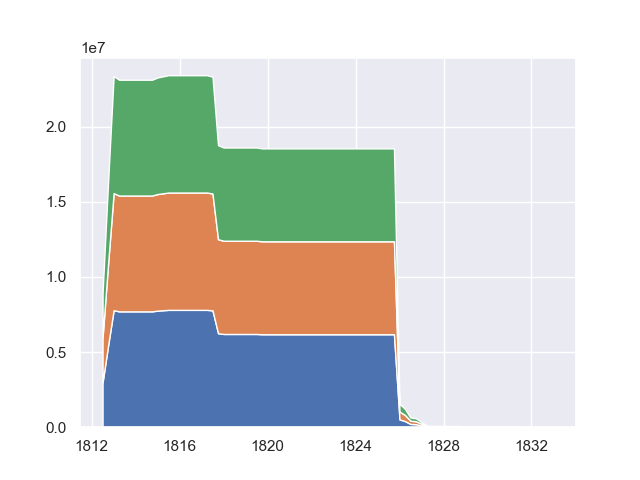

In [ ]:
# Treausury Notes of 1812 
